# 0 - Introduction

In [2]:
# Context: 

    # According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible 
    # for approximately 11% of total deaths.
    # This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, 
    # various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Objective: 

    # Our top priority in this health problem is to identify patients with a stroke.

# Dataset used: 

    #Strokes Dataset (https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

# Atributte Information:

    # 1) id: unique identifier
    # 2) gender: "Male", "Female" or "Other"
    # 3) age: age of the patient
    # 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    # 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    # 6) ever_married: "No" or "Yes"
    # 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    # 8) Residence_type: "Rural" or "Urban"
    # 9) avg_glucose_level: average glucose level in blood
    # 10) bmi: body mass index
    # 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
    # 12) stroke: 1 if the patient had a stroke or 0 if not
    #*Note: "Unknown" in smoking_status means that the information is unavailable for this patient
    
# Evaluation:

    # For evaluation tecnics we are going to use Recall instead of F1-score (suggested by the kaggles author)
    
# Dataset Author:

    #fedesoriano (https://www.kaggle.com/fedesoriano)

# 1 - Importing useful libraries

In [3]:
# Basic Libraries

import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import time
from statistics import mean, median, mode, stdev 

#Visulaization Libraries

import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Model Helpers

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder   
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)


# Dimensionality Reduction Libraries

from sklearn.decomposition import PCA
import pylab as pl

# Imbalance Dataset Handling

from imblearn.over_sampling import (SMOTE,
                                    ADASYN)

# Model Algorithams

import sklearn as sk
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)



# 2 - Exploring the Data

In [4]:
# Upload Strokes dataset

def load_stroke_data():
    csv_path = ("healthcare-dataset-stroke-data.csv")
    return pd.read_csv(csv_path)

In [5]:
# Get Info

strokes = load_stroke_data()

In [6]:
# Check First Lines

strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# Check for null and non null variables
# We can see that the bmi collum has some null data. We can fix this later

strokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# Checking numeric variables

strokes.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# Checking categorical variables distribution

In [10]:
strokes["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
strokes["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [12]:
strokes["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [13]:
strokes["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [14]:
strokes["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [15]:
# Creating pie charts so we can:
# 2.1- See the distribution of the categorical variables
# 2.2- Compare the categorical data in the stroke-yes and stroke-no datasets.

## 2.1 - Pie Charts of The Dataset (Catagorical Variables Only)

In [16]:
# First, we make dictioneries out of each categorical variables, so we can use it on the pie charts:

dict_gender = dict(strokes["gender"].value_counts())
dict_ever_married = dict(strokes["ever_married"].value_counts())
dict_work_type = dict(strokes["work_type"].value_counts())
dict_residence_type = dict(strokes["Residence_type"].value_counts())
dict_smoking_status = dict(strokes["smoking_status"].value_counts())
dict_heart_disease = dict(strokes["heart_disease"].value_counts())
dict_hypertension = dict(strokes["hypertension"].value_counts())

# Then, we make lists out of keys and values of the dicts above

keys_gender = list(dict_gender.keys())
values_gender = list(dict_gender.values())

keys_ever_married = list(dict_ever_married.keys())
values_ever_married = list(dict_ever_married.values())

keys_work_type = list(dict_work_type.keys())
values_work_type = list(dict_work_type.values())

keys_residence_type = list(dict_residence_type.keys())
values_residence_type = list(dict_residence_type.values())

keys_smoking_status = list(dict_smoking_status.keys())
values_smoking_status = list(dict_smoking_status.values())

keys_heart_disease = list(dict_heart_disease.keys())
values_heart_disease = list(dict_heart_disease.values())

keys_hypertension = list(dict_hypertension.keys())
values_hypertension = list(dict_hypertension.values())

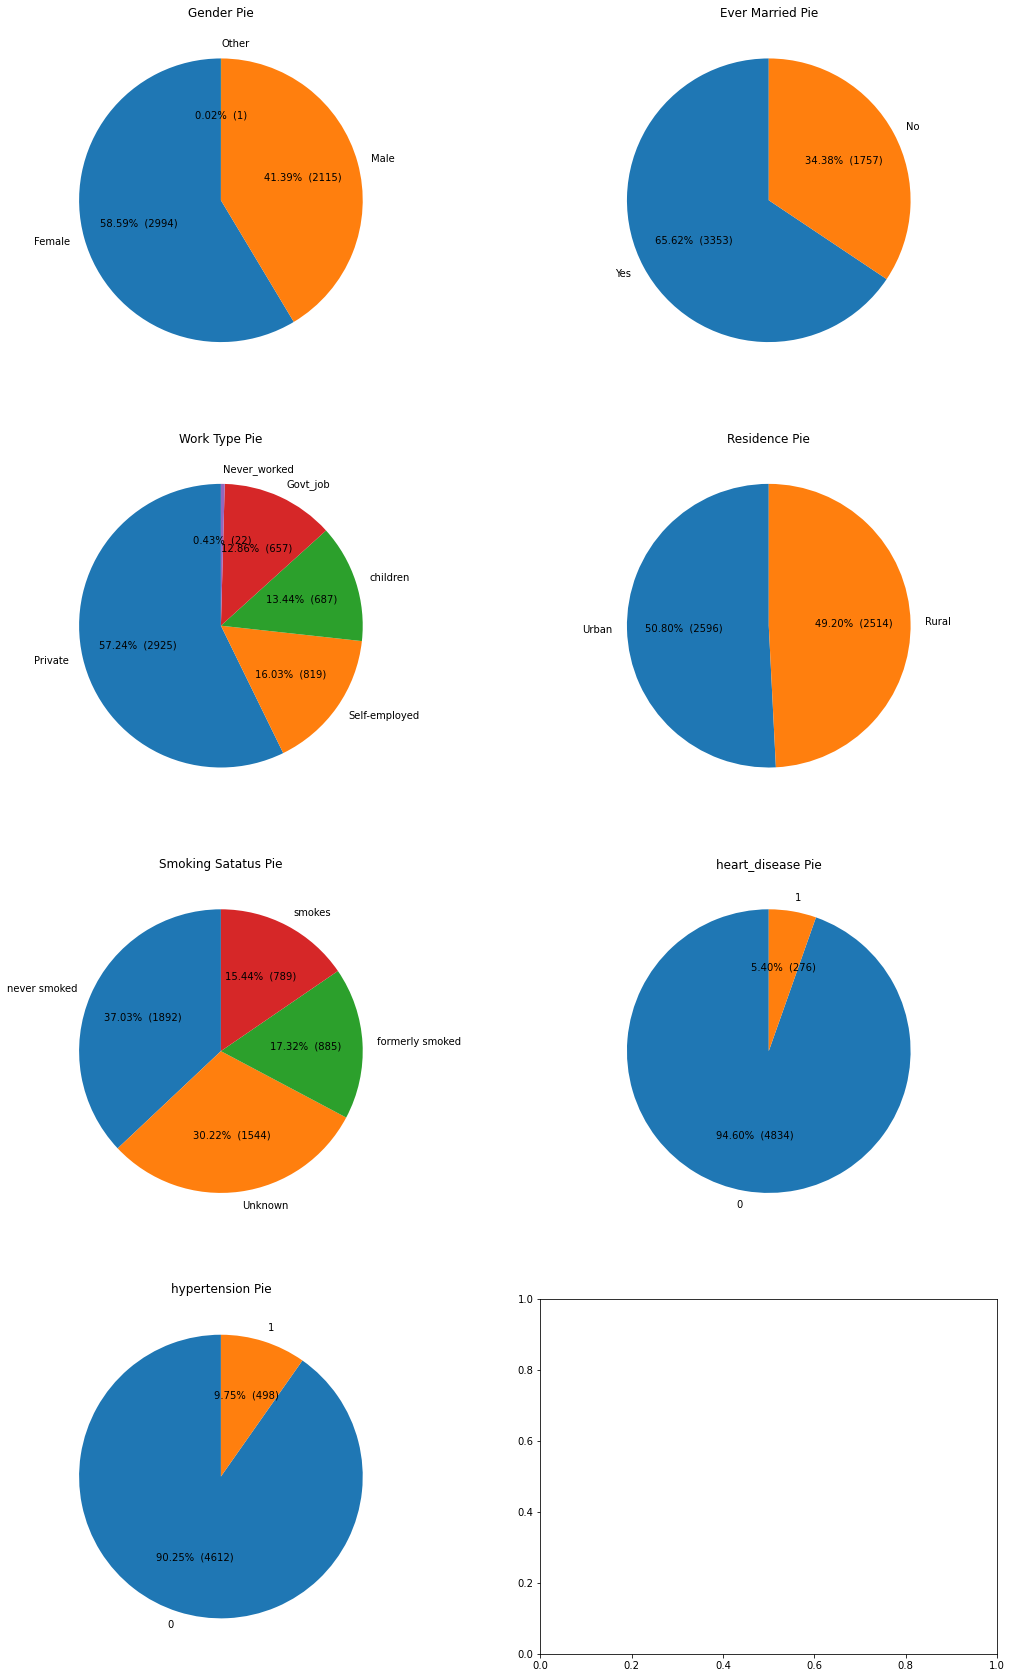

In [17]:
# Function to make % and values inside the graph

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Creating pie charts for each categorical variables

fig, axes = plt.subplots(4, 2, figsize=(18,30))

axes[0][0].pie(values_gender, labels = keys_gender, startangle = 90, autopct=make_autopct(values_gender))
axes[0][0].set_title("Gender Pie")

axes[0][1].pie(values_ever_married, labels = keys_ever_married, startangle = 90, autopct=make_autopct(values_ever_married))
axes[0][1].set_title("Ever Married Pie")

axes[1][0].pie(values_work_type, labels = keys_work_type, startangle = 90, autopct=make_autopct(values_work_type))
axes[1][0].set_title("Work Type Pie")

axes[1][1].pie(values_residence_type, labels = keys_residence_type, startangle = 90, autopct=make_autopct(values_residence_type))
axes[1][1].set_title("Residence Pie")

axes[2][0].pie(values_smoking_status, labels = keys_smoking_status, startangle = 90, autopct=make_autopct(values_smoking_status))
axes[2][0].set_title("Smoking Satatus Pie")

axes[2][1].pie(values_heart_disease, labels = keys_heart_disease, startangle = 90, autopct=make_autopct(values_heart_disease))
axes[2][1].set_title("heart_disease Pie")

axes[3][0].pie(values_hypertension, labels = keys_hypertension, startangle = 90, autopct=make_autopct(values_hypertension))
axes[3][0].set_title("hypertension Pie")

plt.show()

## 2.2 - Pie Charts Comparing Strokes = 1 and Strokes = 0 Datasets (Catagorical Variables Only)

In [18]:
# Creating two datasets, one with strokes=1 and the other with strokes=0.
# Then, we can plot the pie charts and compare each dataset

In [19]:
strokes_yes = strokes[(strokes.stroke == 1)]
strokes_yes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [20]:
strokes_no = strokes[(strokes.stroke == 0)]
strokes_no.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [21]:
# First, we make dictioneries out of each categorical variables, so we can use it on the pie charts:

dict_gender_strokes_yes = dict(strokes_yes["gender"].value_counts())
dict_ever_married_strokes_yes = dict(strokes_yes["ever_married"].value_counts())
dict_work_type_strokes_yes = dict(strokes_yes["work_type"].value_counts())
dict_residence_type_strokes_yes = dict(strokes_yes["Residence_type"].value_counts())
dict_smoking_status_strokes_yes = dict(strokes_yes["smoking_status"].value_counts())
dict_heart_disease_strokes_yes = dict(strokes_yes["heart_disease"].value_counts())
dict_hypertension_strokes_yes = dict(strokes_yes["hypertension"].value_counts())

# Then, we make lists out of keys and values of the dicts above

keys_gender_strokes_yes = list(dict_gender_strokes_yes.keys())
values_gender_strokes_yes = list(dict_gender_strokes_yes.values())

keys_ever_married_strokes_yes = list(dict_ever_married_strokes_yes.keys())
values_ever_married_strokes_yes = list(dict_ever_married_strokes_yes.values())

keys_work_type_strokes_yes = list(dict_work_type_strokes_yes.keys())
values_work_type_strokes_yes = list(dict_work_type_strokes_yes.values())

keys_residence_type_strokes_yes = list(dict_residence_type_strokes_yes.keys())
values_residence_type_strokes_yes = list(dict_residence_type_strokes_yes.values())

keys_smoking_status_strokes_yes = list(dict_smoking_status_strokes_yes.keys())
values_smoking_status_strokes_yes = list(dict_smoking_status_strokes_yes.values())

keys_heart_disease_strokes_yes = list(dict_heart_disease_strokes_yes.keys())
values_heart_disease_strokes_yes = list(dict_heart_disease_strokes_yes.values())

keys_hypertension_strokes_yes = list(dict_hypertension_strokes_yes.keys())
values_hypertension_strokes_yes = list(dict_hypertension_strokes_yes.values())

In [22]:
# We do the same for the Strokes_no dataset

dict_gender_strokes_no = dict(strokes_no["gender"].value_counts())
dict_ever_married_strokes_no = dict(strokes_no["ever_married"].value_counts())
dict_work_type_strokes_no = dict(strokes_no["work_type"].value_counts())
dict_residence_type_strokes_no = dict(strokes_no["Residence_type"].value_counts())
dict_smoking_status_strokes_no = dict(strokes_no["smoking_status"].value_counts())
dict_heart_disease_strokes_no = dict(strokes_no["heart_disease"].value_counts())
dict_hypertension_strokes_no = dict(strokes_no["hypertension"].value_counts())

# Making lists out of keys and values of the dicts above

keys_gender_strokes_no = list(dict_gender_strokes_no.keys())
values_gender_strokes_no = list(dict_gender_strokes_no.values())

keys_ever_married_strokes_no = list(dict_ever_married_strokes_no.keys())
values_ever_married_strokes_no = list(dict_ever_married_strokes_no.values())

keys_work_type_strokes_no = list(dict_work_type_strokes_no.keys())
values_work_type_strokes_no = list(dict_work_type_strokes_no.values())

keys_residence_type_strokes_no = list(dict_residence_type_strokes_no.keys())
values_residence_type_strokes_no = list(dict_residence_type_strokes_no.values())

keys_smoking_status_strokes_no = list(dict_smoking_status_strokes_no.keys())
values_smoking_status_strokes_no = list(dict_smoking_status_strokes_no.values())

keys_heart_disease_strokes_no = list(dict_heart_disease_strokes_no.keys())
values_heart_disease_strokes_no = list(dict_heart_disease_strokes_no.values())

keys_hypertension_strokes_no = list(dict_hypertension_strokes_no.keys())
values_hypertension_strokes_no = list(dict_hypertension_strokes_no.values())

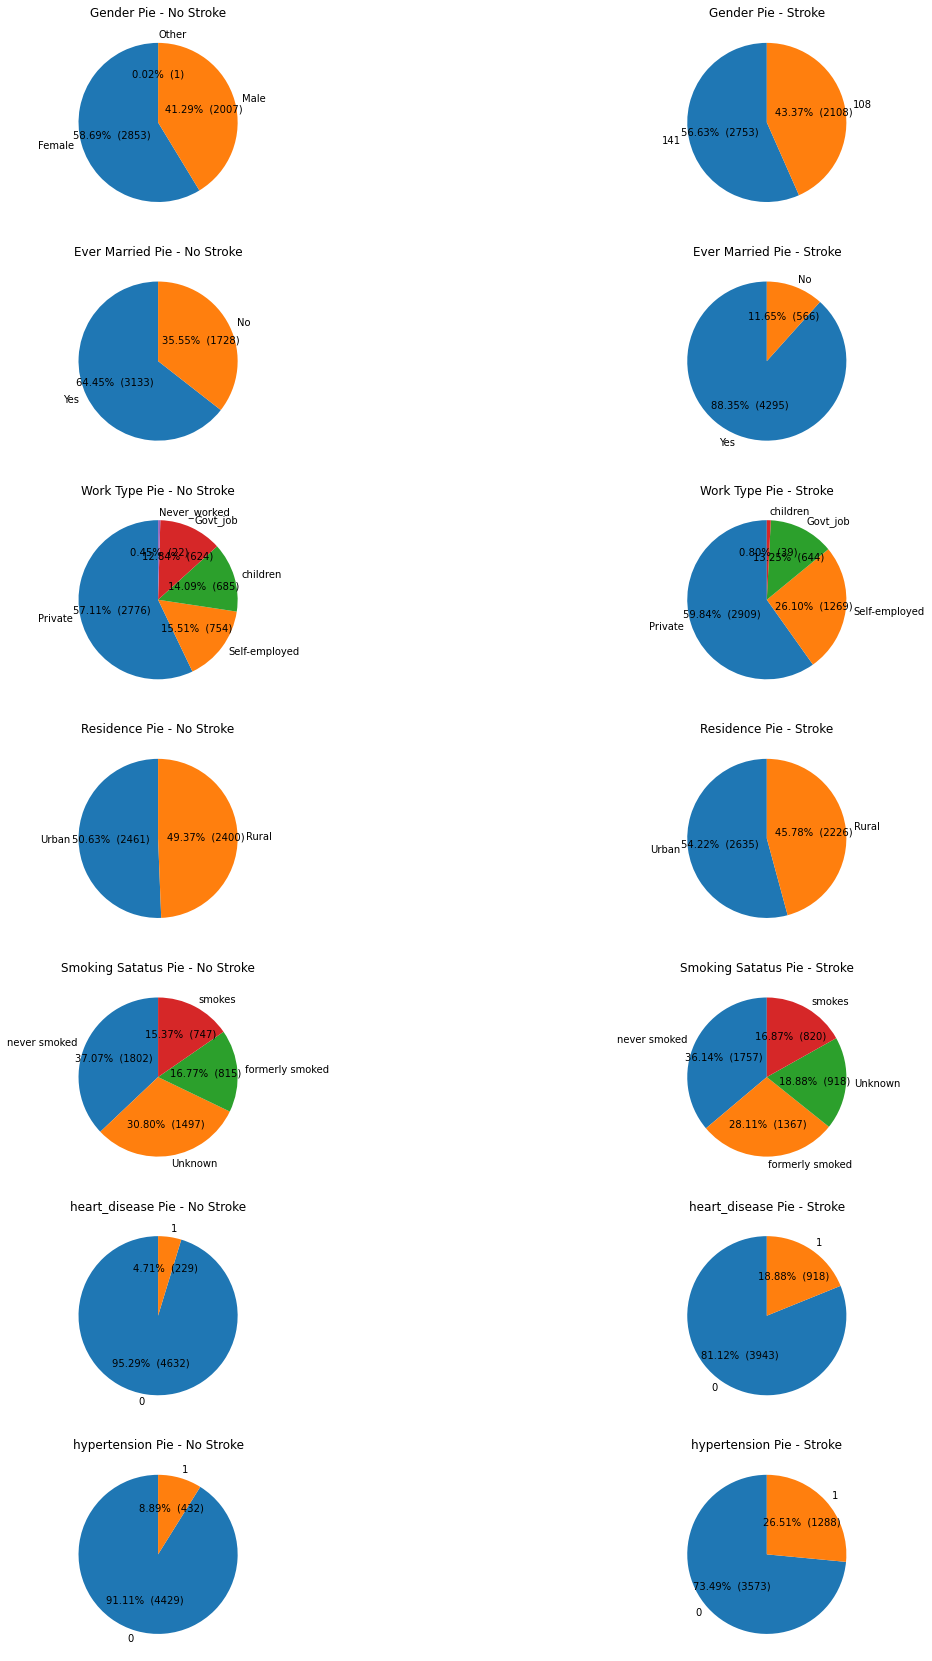

In [23]:
# Plotting side by side each categorical variable from the the datasets strokes_no and strokes_yes

fig, axes = plt.subplots(7, 2, figsize=(20,30))

axes[0][0].pie(values_gender_strokes_no, labels = keys_gender_strokes_no, startangle = 90, autopct=make_autopct(values_gender_strokes_no))
axes[0][0].set_title("Gender Pie - No Stroke")

axes[0][1].pie(values_gender_strokes_yes, labels = values_gender_strokes_yes, startangle = 90, autopct=make_autopct(values_ever_married_strokes_no))
axes[0][1].set_title("Gender Pie - Stroke")

axes[1][0].pie(values_ever_married_strokes_no, labels = keys_ever_married_strokes_no, startangle = 90, autopct=make_autopct(values_ever_married_strokes_no))
axes[1][0].set_title("Ever Married Pie - No Stroke")

axes[1][1].pie(values_ever_married_strokes_yes, labels = keys_ever_married_strokes_yes, startangle = 90, autopct=make_autopct(values_ever_married_strokes_no))
axes[1][1].set_title("Ever Married Pie - Stroke")

axes[2][0].pie(values_work_type_strokes_no, labels = keys_work_type_strokes_no, startangle = 90, autopct=make_autopct(values_work_type_strokes_no))
axes[2][0].set_title("Work Type Pie - No Stroke")

axes[2][1].pie(values_work_type_strokes_yes, labels = keys_work_type_strokes_yes, startangle = 90, autopct=make_autopct(values_work_type_strokes_no))
axes[2][1].set_title("Work Type Pie - Stroke")

axes[3][0].pie(values_residence_type_strokes_no, labels = keys_residence_type_strokes_no, startangle = 90, autopct=make_autopct(values_residence_type_strokes_no))
axes[3][0].set_title("Residence Pie - No Stroke")

axes[3][1].pie(values_residence_type_strokes_yes, labels = keys_residence_type_strokes_yes, startangle = 90, autopct=make_autopct(values_residence_type_strokes_no))
axes[3][1].set_title("Residence Pie - Stroke")

axes[4][0].pie(values_smoking_status_strokes_no, labels = keys_smoking_status_strokes_no, startangle = 90, autopct=make_autopct(values_smoking_status_strokes_no))
axes[4][0].set_title("Smoking Satatus Pie - No Stroke")

axes[4][1].pie(values_smoking_status_strokes_yes, labels = keys_smoking_status_strokes_yes, startangle = 90, autopct=make_autopct(values_smoking_status_strokes_no))
axes[4][1].set_title("Smoking Satatus Pie - Stroke")

axes[5][0].pie(values_heart_disease_strokes_no, labels = keys_heart_disease_strokes_no, startangle = 90, autopct=make_autopct(values_heart_disease_strokes_no))
axes[5][0].set_title("heart_disease Pie - No Stroke")

axes[5][1].pie(values_heart_disease_strokes_yes, labels = keys_heart_disease_strokes_yes, startangle = 90, autopct=make_autopct(values_heart_disease_strokes_no))
axes[5][1].set_title("heart_disease Pie - Stroke")

axes[6][0].pie(values_hypertension_strokes_no, labels = keys_hypertension_strokes_no, startangle = 90, autopct=make_autopct(values_hypertension_strokes_no))
axes[6][0].set_title("hypertension Pie - No Stroke")

axes[6][1].pie(values_hypertension_strokes_yes, labels = keys_hypertension_strokes_yes, startangle = 90, autopct=make_autopct(values_hypertension_strokes_no))
axes[6][1].set_title("hypertension Pie - Stroke")

plt.show()

In [24]:
# By analysing both groups of pie charts (strokes=1 and strokes=0) we can see that:

# 1- gender doesn't seem like a good variable to identify stroke. Both pie charts look the same.
# 2- ever_married could be a variable related to stroke. We have a prevelance of people who were married
#  and had a stroke (88% x 64%).
# 3- work_type: children seems to have lower chance of having a stroke. Self-employed has a higher % in the strokes_yes dataset
#  then in the strokes_no dataset (16% x 25%)
# 4- residence_type: People with residence_type=urban seems to be a little more likely to have a stroke.
# 5- Smoking_status: People who formerly smoked seems to be more likely of having a stroke. People with unknown status seems 
#  to have lower chance of having a stroke. Even thow, Smoking_status doesn't seems to be a good variable for stroke prediction
#  since both pie charts look similar.
# 6- People with heart diseases seems to be more likely of having a stroke.
# 7- People with hypertension seems to be more likely of having a stroke.

## 2.3 - Plotting Numerical Variables

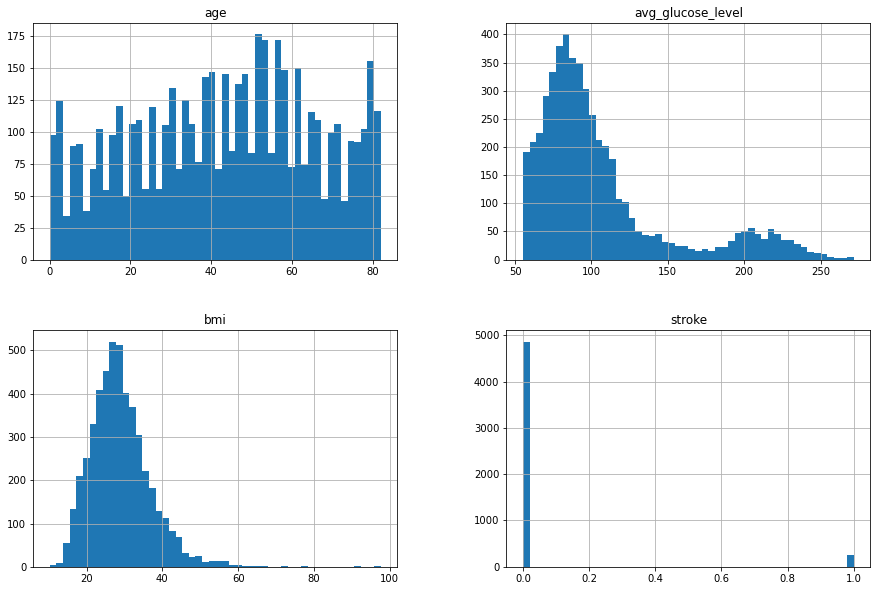

In [25]:
# Now, we should check the continous variables. Let's start by plotting some histograms:

# We can se clearly a prevalence on our target variable(strokes=0 class>>strokes=1 class).

strokes_numerical = pd.DataFrame(strokes, columns = ['age', 'avg_glucose_level', 'bmi','stroke'])
strokes_numerical.hist(bins=50, figsize=(15,10))
plt.show()

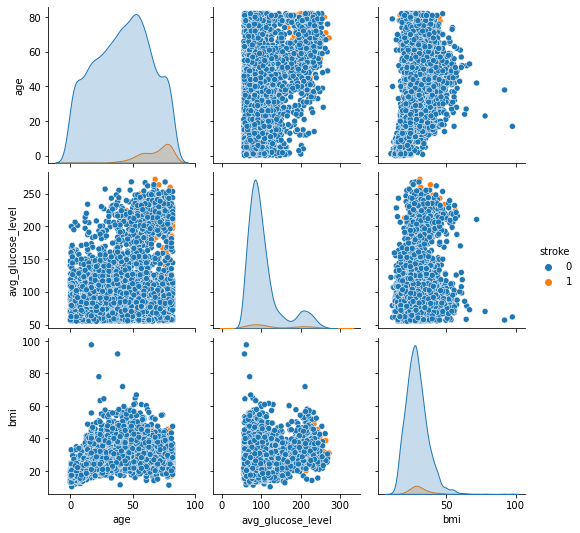

In [26]:
# Then, we can use pairplot to identify, mostly, how the contious variables behave when strokes=0 and strokes=1.

sns.pairplot(strokes, vars = ['age', 'avg_glucose_level','bmi'], hue = "stroke", size = 2.5);

In [27]:
# By analysing the graphs above, we can see that:

# 1-Age: Older people seems to be more likely to have a stroke
# 2-avg_glucose_level: Both graphs look similar, despite the fact that the strokes=0 has higher prevelance over the strokes=1 data.
# 3-bmi:  Both graphs Both graphs look similar, despite the fact that the strokes=0 has higher prevelance over the strokes=1 data.

# 3 - Splitting Between Train and Test Set

In [28]:
# Splitting the data into train and test set. Here we choose a 80%/20% partition between train and test set

train_set, test_set = train_test_split(strokes, test_size=0.2, random_state=42)

# Making copies of the train and test set

train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

# 4 - Data Preparation

## 4.1 - Data Preparation Without Using Pipelines

## 4.1.1 - Dealing With Null Data

In [29]:
# 4% of the bmi collumn is na. We can replace the NA values for the median

len(train_set_copy[train_set["bmi"].isna()])/len(train_set_copy)

0.03816046966731898

In [30]:
train_set_copy["bmi"].median()

28.0

In [31]:
# Replacing for the median

median = train_set_copy["bmi"].median()
train_set_copy["bmi"].fillna(median, inplace=True)

In [32]:
# Checking if replacement works

train_set_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 802 to 860
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4088 non-null   int64  
 1   gender             4088 non-null   object 
 2   age                4088 non-null   float64
 3   hypertension       4088 non-null   int64  
 4   heart_disease      4088 non-null   int64  
 5   ever_married       4088 non-null   object 
 6   work_type          4088 non-null   object 
 7   Residence_type     4088 non-null   object 
 8   avg_glucose_level  4088 non-null   float64
 9   bmi                4088 non-null   float64
 10  smoking_status     4088 non-null   object 
 11  stroke             4088 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 415.2+ KB


In [33]:
# Separating into 4 dataframes. We will deal with each dataset in the folloiwng sections:

# 1- Features with binary categorical classes
train_cat_ord_encod = train_set_copy[['gender','ever_married','Residence_type']]

# 2- Features with multiple(>2) categorical classes
train_cat_onehot_encod = train_set_copy[['work_type','smoking_status']]

# 3- Numerical features, except the ones that are categorical and already encoded features
train_num_std = train_set_copy[['age','avg_glucose_level','bmi']]

# 4- Categorical and already encoded features
train_other = train_set_copy[['hypertension','heart_disease','stroke']]

## 4.1.2 - Dealing With Variables With  2 Classes (OrdinalEncoder)

In [34]:
# For the binary categorical features, we use ordinal encoder

ordinal_encoder = OrdinalEncoder()
train_ordinal_encoded = ordinal_encoder.fit_transform(train_cat_ord_encod)
train_ordinal_encoded[:10]

array([[1., 1., 0.],
       [0., 1., 1.],
       [0., 0., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [0., 1., 0.],
       [1., 1., 0.]])

In [35]:
# Creating a dataframe out of the encoded table above

train_ordinal_encoded_transformed = pd.DataFrame(train_ordinal_encoded,columns=['gender','ever_married','Residence_type'])
train_ordinal_encoded_transformed.head()

,gender,ever_married,Residence_type
0,1.0,1.0,0.0
1,0.0,1.0,1.0
2,0.0,0.0,0.0
3,1.0,1.0,1.0
4,0.0,0.0,0.0


In [36]:
# Checking out the classes of what it was encoded from

ordinal_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Rural', 'Urban'], dtype=object)]

## 4.1.3 - Dealing With Variables With More Than 2 Classes (OneHotEncoder)

In [37]:
# For the multiple categorical features, we use onehotencoder.
# Since there are not so many classes in each of these variables, we should not be worried about dimensionality curse.

cat_encoder = OneHotEncoder(sparse=False)
train_onehot_encoded = cat_encoder.fit_transform(train_cat_onehot_encod)
train_onehot_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [38]:
# Creating a dataframe out of the encoded table above

train_onehot_encoded_transformed = pd.DataFrame(train_onehot_encoded,columns=list(cat_encoder.categories_[0])+list(cat_encoder.categories_[1]))
train_onehot_encoded_transformed.head()

,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
# Checking out the classes of what it was encoded from

cat_encoder.categories_

[array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

## 4.1.3 - Dealing Numeric Variables (StandardScaler)

In [40]:
# We use standard scaler since it is less affected by outliers and
# it wont have much of an impact in the algorithims we pick later on.

scaler=StandardScaler()
scaler.fit(train_num_std)
train_num_std_transformed = pd.DataFrame(scaler.transform(train_num_std),columns=['age_Transformed','avg_glucose_level_Transformed','bmi_Transformed'])
train_num_std_transformed

,age_Transformed,avg_glucose_level_Transformed,bmi_Transformed
0,1.584155,0.135593,-0.053607
1,0.829708,-0.397457,0.951594
2,-0.989841,-1.028701,0.616527
3,-0.546049,-0.893246,0.191249
4,-0.546049,-1.026290,-1.161906
...,...,...,...
4083,-0.013498,-0.404471,0.217024
4084,0.785328,1.393916,4.031635
4085,-1.870325,-0.201070,-1.432538
4086,1.628534,1.964446,0.268573


## 4.1.4 - Merging All Datasets And Analyzing Correlations 

In [41]:
# Making copies of each transformed subset of the strokes dataset.

train_num_std_transformed_copy = train_num_std_transformed.copy()
train_onehot_encoded_transformed_copy = train_onehot_encoded_transformed.copy()
train_ordinal_encoded_transformed_copy = train_ordinal_encoded_transformed.copy()
train_other_copy = train_other.copy()

In [42]:
# Merging:

train_num_std_transformed_copy.reset_index(drop = True, inplace = True)
train_onehot_encoded_transformed_copy.reset_index(drop = True, inplace = True)
train_ordinal_encoded_transformed_copy.reset_index(drop = True, inplace = True)
train_other_copy.reset_index(drop=True, inplace = True)

train_merged_tables_final = pd.concat([train_num_std_transformed_copy, train_onehot_encoded_transformed_copy,
                              train_ordinal_encoded_transformed_copy, train_other_copy], axis=1)

In [43]:
train_merged_tables_final.head()

,age_Transformed,avg_glucose_level_Transformed,bmi_Transformed,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,gender,ever_married,Residence_type,hypertension,heart_disease,stroke
0,1.584155,0.135593,-0.053607,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,0
1,0.829708,-0.397457,0.951594,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0
2,-0.989841,-1.028701,0.616527,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0
3,-0.546049,-0.893246,0.191249,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0,0,0
4,-0.546049,-1.026290,-1.161906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0


In [44]:
# We can see the correlation with each variable 

corr_matrix = train_merged_tables_final.corr()

corr_matrix["stroke"].sort_values(ascending=False)

stroke                           1.000000
age_Transformed                  0.237170
heart_disease                    0.131467
avg_glucose_level_Transformed    0.122887
hypertension                     0.118129
ever_married                     0.097386
Self-employed                    0.057212
formerly smoked                  0.053811
bmi_Transformed                  0.035732
Residence_type                   0.014873
smokes                           0.012621
Private                          0.012382
gender                           0.006731
Govt_job                         0.001350
never smoked                    -0.002271
Never_worked                    -0.015352
Unknown                         -0.052046
children                        -0.078403
Name: stroke, dtype: float64

In [45]:
# Analysing the correlation matrix, we can notice:

# 1- Some of our analysis when plotting the graphs in section 1 are reassured

# 2- A correlation higher than 5% from the variables: formely smoked, Self-employed, ever_married, hypertension,
#    avg_glucose_level_Transformed, heart_disease and age_Transformed.

# 3- The highest correlation is with the age variable, which has a correlation of 23%

# 4- children variable has the highest negative correlation (-7%)

In [46]:
# Also, we can plot the correlation matrix of all variables:

corr_matrix.style.background_gradient(cmap='coolwarm')

,age_Transformed,avg_glucose_level_Transformed,bmi_Transformed,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,gender,ever_married,Residence_type,hypertension,heart_disease,stroke
age_Transformed,1.000000,0.243191,0.319305,0.134981,-0.083563,0.103991,0.329911,-0.627902,-0.372132,0.242749,0.108589,0.072679,-0.032615,0.670303,0.031487,0.273662,0.264925,0.237170
avg_glucose_level_Transformed,0.243191,1.000000,0.167152,0.011861,-0.018091,0.010476,0.075579,-0.105490,-0.102232,0.079986,0.022073,0.016379,0.060328,0.160943,-0.004052,0.191689,0.158943,0.122887
bmi_Transformed,0.319305,0.167152,1.000000,0.077054,-0.027976,0.188928,0.085278,-0.440181,-0.259561,0.101536,0.103128,0.085161,-0.036976,0.320473,-0.012765,0.165152,0.033418,0.035732
Govt_job,0.134981,0.011861,0.077054,1.000000,-0.027296,-0.449069,-0.170353,-0.151711,-0.096596,0.025371,0.044504,0.036532,-0.016193,0.133472,0.021445,0.023473,-0.004614,0.001350
Never_worked,-0.083563,-0.018091,-0.027976,-0.027296,1.000000,-0.080884,-0.030683,-0.027325,0.015031,-0.032201,0.033626,-0.030097,0.019559,-0.096580,0.019428,-0.022576,-0.016561,-0.015352
Private,0.103991,0.010476,0.188928,-0.449069,-0.080884,1.000000,-0.504787,-0.449549,-0.198109,0.018885,0.103055,0.093927,-0.034308,0.143041,-0.018622,-0.012267,-0.002923,0.012382
Self-employed,0.329911,0.075579,0.085278,-0.170353,-0.030683,-0.504787,1.000000,-0.170535,-0.110526,0.102864,0.027341,-0.004069,-0.028580,0.197212,0.011921,0.114805,0.093147,0.057212
children,-0.627902,-0.105490,-0.440181,-0.151711,-0.027325,-0.449549,-0.170535,1.000000,0.503216,-0.157999,-0.231843,-0.163287,0.093361,-0.536787,-0.011133,-0.125479,-0.088813,-0.078403
Unknown,-0.372132,-0.102232,-0.259561,-0.096596,0.015031,-0.198109,-0.110526,0.503216,1.000000,-0.301799,-0.502159,-0.282080,0.064065,-0.322224,-0.015648,-0.136692,-0.064682,-0.052046
formerly smoked,0.242749,0.079986,0.101536,0.025371,-0.032201,0.018885,0.102864,-0.157999,-0.301799,1.000000,-0.350915,-0.197121,0.060500,0.173320,0.004921,0.071013,0.076058,0.053811


In [47]:
train_merged_tables_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age_Transformed                4088 non-null   float64
 1   avg_glucose_level_Transformed  4088 non-null   float64
 2   bmi_Transformed                4088 non-null   float64
 3   Govt_job                       4088 non-null   float64
 4   Never_worked                   4088 non-null   float64
 5   Private                        4088 non-null   float64
 6   Self-employed                  4088 non-null   float64
 7   children                       4088 non-null   float64
 8   Unknown                        4088 non-null   float64
 9   formerly smoked                4088 non-null   float64
 10  never smoked                   4088 non-null   float64
 11  smokes                         4088 non-null   float64
 12  gender                         4088 non-null   f

## 4.2 - Preprocessing using a pipeline

In [48]:
# Now, we will use pipelines for preprocessing the tables. The result of the pipeline should be the same we got
# by the end of our manual preprocessing above.

In [49]:
# Defining X and Y for both train and test sets

x_train = train_set_copy.drop("stroke", axis=1)
x_train = x_train.reset_index(drop=True)

y_train = train_set_copy["stroke"].copy()
y_train= y_train.reset_index(drop=True)

x_test = test_set_copy.drop("stroke", axis=1)
x_test = x_test.reset_index(drop=True)

y_test = test_set_copy["stroke"].copy()
y_test = y_test.reset_index(drop=True)

In [50]:
# Pipeline for the numeric features using imputer and StandarScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = "median")),
        ('std_scaler', StandardScaler()),
    ])

train_num_std_transformed_ppl = num_pipeline.fit_transform(train_num_std)

In [51]:
# Creating a class that transforms dataframe to numpy. We will use it on the categorical data that are already encoded.

class DataFrametoNumpy(BaseEstimator, TransformerMixin):
    def __init__(self,Convert=True):
        self.Convert=Convert
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.values

In [52]:
# We can, than, build the full pipeline using the same strategies we used in the manual pre processing.

num_attribs = list(train_num_std)
cat_attribs = list(train_cat_onehot_encod)
cat_binary_attribs = list(train_cat_ord_encod)
already_transformed_attribs = list(train_other[['hypertension','heart_disease']])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("cat_binary",OrdinalEncoder(),cat_binary_attribs),
        ("already_transformed",DataFrametoNumpy(),already_transformed_attribs)
    ])

# We run the datasets into the pipeline

x_train_prepared= full_pipeline.fit_transform(x_train)
x_test_prepared= full_pipeline.fit_transform(x_test)

In [53]:
# Checking how the dataset looks like after the pipeline

(pd.DataFrame(x_train_prepared)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.584155,0.135593,-0.053607,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.829708,-0.397457,0.951594,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.989841,-1.028701,0.616527,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.546049,-0.893246,0.191249,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,-0.546049,-1.026290,-1.161906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Now, we should check if both final tables(with and without pipelines) look the same.
# First, we select the manual dataset and place the variables in the same order of the pipeline dataset.
# Then, we use .describe to compare both tables

train_merged_tables_final_order=train_merged_tables_final[['age_Transformed','avg_glucose_level_Transformed',
                                                           'bmi_Transformed','Govt_job','Never_worked',
                                                           'Private','Self-employed','children','Unknown',
                                                           'formerly smoked','never smoked','smokes','gender',
                                                           'ever_married','Residence_type','hypertension','heart_disease']]
train_merged_tables_final_order.describe()

,age_Transformed,avg_glucose_level_Transformed,bmi_Transformed,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,gender,ever_married,Residence_type,hypertension,heart_disease
count,4.088000e+03,4.088000e+03,4.088000e+03,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,1.894685e-16,7.803879e-17,-1.263395e-16,0.131605,0.004892,0.570939,0.160714,0.131849,0.301614,0.174168,0.368640,0.155577,0.412671,0.654843,0.511497,0.093933,0.052838
std,1.000122e+00,1.000122e+00,1.000122e+00,0.338102,0.069783,0.495003,0.367312,0.338368,0.459015,0.379301,0.482495,0.362498,0.492375,0.475477,0.499929,0.291772,0.223736
min,-1.914704e+00,-1.125141e+00,-2.399077e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.123242e-01,-6.414065e-01,-6.593057e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.526059e-02,-3.190996e-01,-1.180433e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,7.853284e-01,1.809637e-01,5.005422e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.717292e+00,3.622776e+00,8.851447e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Using the .describe we can see that both tables are the same

(pd.DataFrame(x_train_prepared)).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4.088000e+03,4.088000e+03,4.088000e+03,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,1.894685e-16,7.803879e-17,-1.263395e-16,0.131605,0.004892,0.570939,0.160714,0.131849,0.301614,0.174168,0.368640,0.155577,0.412671,0.654843,0.511497,0.093933,0.052838
std,1.000122e+00,1.000122e+00,1.000122e+00,0.338102,0.069783,0.495003,0.367312,0.338368,0.459015,0.379301,0.482495,0.362498,0.492375,0.475477,0.499929,0.291772,0.223736
min,-1.914704e+00,-1.125141e+00,-2.399077e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.123242e-01,-6.414065e-01,-6.593057e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.526059e-02,-3.190996e-01,-1.180433e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,7.853284e-01,1.809637e-01,5.005422e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.717292e+00,3.622776e+00,8.851447e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5 - Creating oversampled Datasets (SMOTE)

In [56]:
# Since some alrorithims have a better performance  with balanced datasets, we will use SMOTE techniques to oversample 
# the minority class (the data in the stroke=1 class).

# We are going to try 2 different approaches.

# 1- Sampling_strategy='auto'
# 2 - Sampling_strategy='0.3'
# Then, we are going to check which one have a better performance and less overfitting.

In [57]:
sampling_strategy = 'auto'

smote = SMOTE(sampling_strategy = sampling_strategy)

x_resample_auto, y_resample_auto = smote.fit_resample(x_train_prepared, y_train)

In [58]:
sampling_strategy = 0.3

smote = SMOTE(sampling_strategy = sampling_strategy)

x_resample_float, y_resample_float = smote.fit_resample(x_train_prepared, y_train)

In [59]:
# Checking the difference between the target variable classes on each sampling_strategy

pd.DataFrame(y_resample_auto)['stroke'].value_counts()

1    3901
0    3901
Name: stroke, dtype: int64

In [60]:
pd.DataFrame(y_resample_float)['stroke'].value_counts()

0    3901
1    1170
Name: stroke, dtype: int64

In [61]:
pd.DataFrame(y_train)['stroke'].value_counts()

0    3901
1     187
Name: stroke, dtype: int64

In [62]:
# We will use dimension reduction to see the difference between the dataset without oversampling and
# both other datasets with oversampling

In [63]:
pca_no_resample = PCA(n_components= 2).fit_transform(x_train_prepared)

In [64]:
pca_resample_smote_float = PCA(n_components= 2).fit_transform(x_resample_float)

In [65]:
pca_resample_smote_auto = PCA(n_components= 2).fit_transform(x_resample_auto)

Text(3.4, 3.8, 'No stroke')

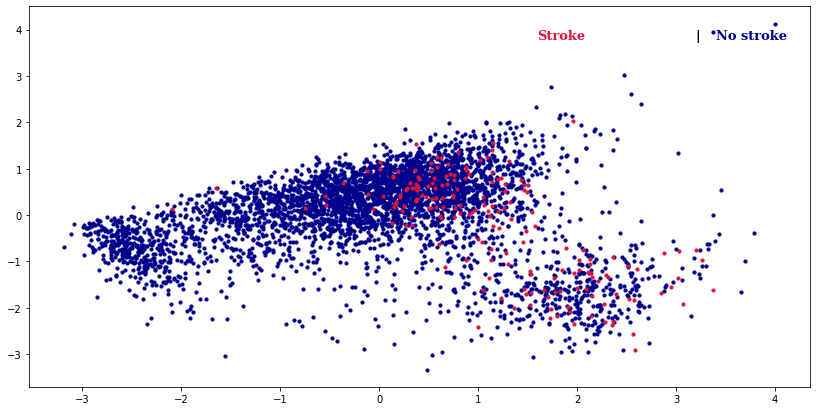

In [66]:
# By analyzing the scatterplot bellow, we notice just a few dots representing stroke=yes in the dataset without oversampling.

fig, ax = plt.subplots(figsize =(14,7))

ax.scatter(pca_no_resample[y_train == 0][:,0], pca_no_resample[y_train == 0][:,1], c = 'darkblue', s = 10)

ax.scatter(pca_no_resample[y_train == 1][:,0], pca_no_resample[y_train == 1][:,1], c = 'crimson', s =10)

ax.text(1.6,3.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='crimson')
ax.text(3.2,3.8,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
ax.text(3.4,3.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='darkblue')

Text(3.4, 3.8, 'No stroke')

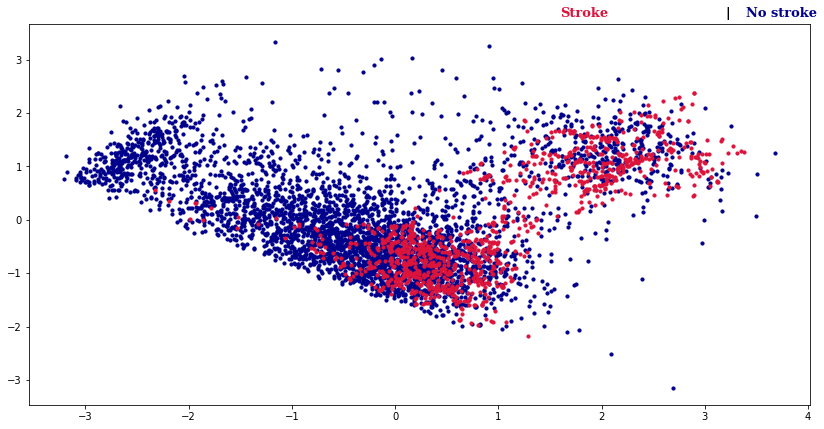

In [67]:
#  By analyzing the scatterplot bellow, we notice higher concentration of the dots representing stroke=yes in 
# the dataset with oversampling (sampling_strategy=0.3).

fig, ax = plt.subplots(figsize =(14,7))

ax.scatter(pca_resample_smote_float[y_resample_float == 0][:,0], pca_resample_smote_float[y_resample_float == 0][:,1], c = 'darkblue', s = 10)

ax.scatter(pca_resample_smote_float[y_resample_float == 1][:,0], pca_resample_smote_float[y_resample_float == 1][:,1], c = 'crimson', s =10)

ax.text(1.6,3.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='crimson')
ax.text(3.2,3.8,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
ax.text(3.4,3.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='darkblue')

Text(3.4, 3.8, 'No stroke')

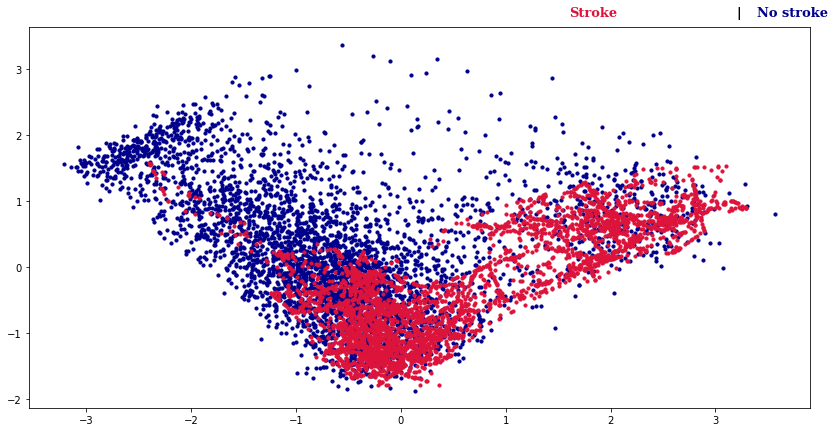

In [68]:
#  By analyzing the scatterplot bellow, we notice a enven higher concentration of the dots representing stroke=yes in 
#  the dataset with oversampling (sampling_strategy=0auto).
# Could this lead to overfitted model?

fig, ax = plt.subplots(figsize =(14,7))

ax.scatter(pca_resample_smote_auto[y_resample_auto == 0][:,0], pca_resample_smote_auto[y_resample_auto == 0][:,1], c = 'darkblue', s = 10)

ax.scatter(pca_resample_smote_auto[y_resample_auto == 1][:,0], pca_resample_smote_auto[y_resample_auto == 1][:,1], c = 'crimson', s =10)

ax.text(1.6,3.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='crimson')
ax.text(3.2,3.8,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
ax.text(3.4,3.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='darkblue')

# 6 - Selecting a Model to Train

## 6.1 - Choosing an Evaluation Metric

In [69]:
# To pick the right evaluation metric for this problem we are taking a few assumptions:
# 1- We are willing to maximyze peoples health
# 2- Health treatments for stroke prevention costs are not relevant
    #2.1 - Health treatments are provided by the public public heath system
    #2.2 - Health treatments are provided by health insurrance companies.

# We are more interested in strokes prevention, so, we are willing to maximyze the chances of people with high probability 
# of having a stroke, take exams as a prevention method and, thereby, reduce their risk of having a stroke. 
# By the assumption 2, we are more worried about false negatives than false positives, since false positives implicates in
# negligible costs and a false negative may lead to threat to life. In this scenario, we will take recall as our main evaluation
# metric. Nevertheless, we will take a closer look at precision, accuracy and F1 score, as we don't want these other metrics to 
# have a bad performance.

## 6.2 - Creating a Class to Run Different Algorithims

In [70]:
# Here, we create a class which

# 1- Trains several algorithims with k-fold cross validation
# 2- Take the mean evaluation metric for each fold
# 3- Plot the confusion matrix
# 4- Predict on the test set
# 5- Takes the same evaluation metrics on the test set
# 6- Plot the confusion matrix on the test set

def run_dif_algorithimns_Cross_Val(X_Train, X_Test, Y_Train, Y_Test, n_folds):
    #Creates list with different algorhithms
    
    classifiers = []
    classifiers.append(LogisticRegression(random_state=42))
    classifiers.append(SGDClassifier(random_state=42,loss="modified_huber"))
    classifiers.append(KNeighborsClassifier())
    classifiers.append(SVC(random_state=42,probability=True))
    classifiers.append(DecisionTreeClassifier(random_state=42))
    classifiers.append(RandomForestClassifier(random_state=42))
    classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), random_state=42))
    classifiers.append(GradientBoostingClassifier(random_state=42))
    classifiers.append(XGBClassifier(random_state = 42,eval_metric = 'logloss',learning_rate = 0.054))
    classifiers.append(LGBMClassifier(random_state = 42,learning_rate = 0.067))
    
    for classifier in classifiers:
        
        t =time.time()
        # Create Algorithim Instance
        Clas=classifier

        # Calculate metrics on the training set with the k-fold cross validation
        Clas_Train_Mean_F1=mean(cross_val_score(Clas, X_Train, Y_Train, cv=n_folds, scoring="f1"))
        Clas_Train_Mean_Recall=mean(cross_val_score(Clas, X_Train, Y_Train, cv=n_folds, scoring="recall"))
        Clas_Train_Mean_Accuracy=mean(cross_val_score(Clas, X_Train, Y_Train, cv=n_folds, scoring="accuracy"))
        Clas_Train_Mean_Precision=mean(cross_val_score(Clas, X_Train, Y_Train, cv=n_folds, scoring="precision"))
        Clas_Train_Mean_Auc=mean(cross_val_score(Clas, X_Train, Y_Train, cv=n_folds, scoring="roc_auc"))

        # Calculate the confusion matrix on the train set
        Clas_Fit_model = Clas.fit (X_Train, Y_Train)
        Clas_Train_Pred = cross_val_predict(Clas, X_Train, Y_Train, cv=n_folds)
        Clas_Train_Cmatrix=confusion_matrix(Y_Train, Clas_Train_Pred)
        #sk.metrics.plot_confusion_matrix(Clas_Fit_model, X_Train, Y_Train)
        
        # Fit and predict on the test set
        
        Clas_Test_predictions = Clas_Fit_model.predict(X_Test)
        Y_Test_Probs = Clas_Fit_model.predict_proba(X_Test)

        # Calculate metrics on the test set
        Clas_Test_F1=f1_score(Y_Test,Clas_Test_predictions)
        Clas_Test_Recall=recall_score(Y_Test,Clas_Test_predictions)
        Clas_Test_Accuracy=accuracy_score(Y_Test,Clas_Test_predictions)
        Clas_Test_Precision= precision_score(Y_Test,Clas_Test_predictions)       
        
        Clas_Test_Auc=roc_auc_score(Y_Test,Y_Test_Probs[:,1])
              
        # Calculate the confusion matrix on the test set
        Clas_Test_Cmatrix=confusion_matrix(Y_Test,Clas_Test_predictions)
        Time = time.time() - t
        
        # Print Results
        
        print("--------------------------------------------------------------------")
        print("TRAIN",Clas)
        print("\nACCURACY SCORE TRAIN: ",Clas_Train_Mean_Accuracy)
        print("RECALL SCORE TRAIN: ",Clas_Train_Mean_Recall)
        print("PRECISION SCORE TRAIN: ",Clas_Train_Mean_Precision)
        print("F1 SCORE TRAIN: ",Clas_Train_Mean_F1)
        print("AUC SCORE TRAIN: ",Clas_Train_Mean_Auc)
        
        print("\nCONFUSION MATRIX TRAIN:")
        print(Clas_Train_Cmatrix)

        print("\n\nTEST",Clas)
        print("\nACCURACY SCORE TEST: ",Clas_Test_Accuracy)
        print("RECALL SCORE TEST: ",Clas_Test_Recall)
        print("PRECISION SCORE TEST: ",Clas_Test_Precision)
        print("F1 SCORE TEST: ",Clas_Test_F1)
        print("AUC SCORE TEST: ",Clas_Test_Auc)
        
        print("\nCONFUSION MATRIX TEST:")
        print(Clas_Test_Cmatrix)
        
        print("\nDone in %f s  \n \n" %Time)

In [71]:
# Now we will run the class above on each dataset we created with 3 folds in the train set.

# 1- Without oversample
# 2- With oversample (samplestrategy=0.3)
# 3- With oversample (samplestrategy=auto)

In [72]:
run_dif_algorithimns_Cross_Val(x_train_prepared, x_test_prepared, y_train, y_test, 3)

--------------------------------------------------------------------
TRAIN LogisticRegression(random_state=42)

ACCURACY SCORE TRAIN:  0.9545009730270928
RECALL SCORE TRAIN:  0.005376344086021505
PRECISION SCORE TRAIN:  0.3333333333333333
F1 SCORE TRAIN:  0.010582010582010581
AUC SCORE TRAIN:  0.8372925629750405

CONFUSION MATRIX TRAIN:
[[3901    0]
 [ 186    1]]


TEST LogisticRegression(random_state=42)

ACCURACY SCORE TEST:  0.9393346379647749
RECALL SCORE TEST:  0.0
PRECISION SCORE TEST:  0.0
F1 SCORE TEST:  0.0
AUC SCORE TEST:  0.8515456989247312

CONFUSION MATRIX TEST:
[[960   0]
 [ 62   0]]

Done in 0.661549 s  
 

--------------------------------------------------------------------
TRAIN SGDClassifier(loss='modified_huber', random_state=42)

ACCURACY SCORE TRAIN:  0.9383601072897487
RECALL SCORE TRAIN:  0.10752688172043011
PRECISION SCORE TRAIN:  0.06410256410256411
F1 SCORE TRAIN:  0.08032128514056225
AUC SCORE TRAIN:  0.6770716393879718

CONFUSION MATRIX TRAIN:
[[3816   85]
 

In [73]:
run_dif_algorithimns_Cross_Val(x_resample_float, x_test_prepared, y_resample_float, y_test, 3)

--------------------------------------------------------------------
TRAIN LogisticRegression(random_state=42)

ACCURACY SCORE TRAIN:  0.8055617569287223
RECALL SCORE TRAIN:  0.4666666666666667
PRECISION SCORE TRAIN:  0.6011238271986803
F1 SCORE TRAIN:  0.5251665786015256
AUC SCORE TRAIN:  0.8504685406107979

CONFUSION MATRIX TRAIN:
[[3539  362]
 [ 624  546]]


TEST LogisticRegression(random_state=42)

ACCURACY SCORE TEST:  0.8835616438356164
RECALL SCORE TEST:  0.43548387096774194
PRECISION SCORE TEST:  0.24324324324324326
F1 SCORE TEST:  0.31213872832369943
AUC SCORE TEST:  0.8486559139784946

CONFUSION MATRIX TEST:
[[876  84]
 [ 35  27]]

Done in 0.891482 s  
 

--------------------------------------------------------------------
TRAIN SGDClassifier(loss='modified_huber', random_state=42)

ACCURACY SCORE TRAIN:  0.7728258549438553
RECALL SCORE TRAIN:  0.1965811965811966
PRECISION SCORE TRAIN:  0.47177512833250534
F1 SCORE TRAIN:  0.2616899871883428
AUC SCORE TRAIN:  0.80256250211615

In [74]:
run_dif_algorithimns_Cross_Val(x_resample_auto, x_test_prepared, y_resample_auto, y_test, 3)

--------------------------------------------------------------------
TRAIN LogisticRegression(random_state=42)

ACCURACY SCORE TRAIN:  0.7845447510326403
RECALL SCORE TRAIN:  0.828503912178009
PRECISION SCORE TRAIN:  0.7617075385654553
F1 SCORE TRAIN:  0.7936544032450475
AUC SCORE TRAIN:  0.8512321112419972

CONFUSION MATRIX TRAIN:
[[2889 1012]
 [ 669 3232]]


TEST LogisticRegression(random_state=42)

ACCURACY SCORE TEST:  0.7534246575342466
RECALL SCORE TEST:  0.7741935483870968
PRECISION SCORE TEST:  0.16783216783216784
F1 SCORE TEST:  0.27586206896551724
AUC SCORE TEST:  0.8504368279569893

CONFUSION MATRIX TEST:
[[722 238]
 [ 14  48]]

Done in 1.151119 s  
 

--------------------------------------------------------------------
TRAIN SGDClassifier(loss='modified_huber', random_state=42)

ACCURACY SCORE TRAIN:  0.7413517483413677
RECALL SCORE TRAIN:  0.6954963637438657
PRECISION SCORE TRAIN:  0.7698782790835658
F1 SCORE TRAIN:  0.7256202114406325
AUC SCORE TRAIN:  0.8256051500363095


### 6.3 - Logistic Regression

In [75]:
# Despite the fact we've seen better recall on other algortithims, we will proceed with the Logistic Regression.
# The logistic regression shows us descent recall and less overfitting when we compare the stats of the train set with the
# stats of the test set.

# In the following code, we will try to improve our results in the Logistic Regression by using grid search
# Notice that we selected the auto smote dataset, since it provided best results

Log_Reg = LogisticRegression(random_state=42)

mean(cross_val_score(Log_Reg, x_resample_auto, y_resample_auto, cv = 3, scoring="recall"))

0.828503912178009

In [76]:
# We use grid_search to get better results, by changing the hyperparameters:

param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none']
    }
  ]

grid_search_1 = GridSearchCV(Log_Reg, param_grid, cv = 3,
                           scoring = 'recall', return_train_score = True)
grid_search_1.fit(x_resample_auto, y_resample_auto)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet', 'none']}],
             return_train_score=True, scoring='recall')

In [77]:
grid_search_1.best_params_

{'penalty': 'l2'}

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'class_weight': [{0:1.0, 1:6.5},{0:1.0, 1:6.6}], 'fit_intercept': [True, False],
     'C':[0.001,0.01,0.1,1,3,5],'max_iter':[100,1000,5000]
    }
  ]

grid_search = GridSearchCV(Log_Reg, param_grid, cv=3,
                           scoring='recall', return_train_score=True)
grid_search.fit(x_resample_auto, y_resample_auto)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 3, 5],
                          'class_weight': [{0: 1.0, 1: 6.5}, {0: 1.0, 1: 6.6}],
                          'fit_intercept': [True, False],
                          'max_iter': [100, 1000, 5000]}],
             return_train_score=True, scoring='recall')

In [79]:
grid_search.best_params_

{'C': 0.001,
 'class_weight': {0: 1.0, 1: 6.5},
 'fit_intercept': True,
 'max_iter': 100}

In [86]:
# Here we add regularization to the model to reduce the overfitting. We use class_weight = {0: 1.0, 1: 3.2} so we can maxymize
# recall and still have a decent F1 score.

#Finally, we reach our final results with the following code:

Clas = LogisticRegression(C=0.001, penalty='elasticnet', solver='saga', l1_ratio=0, class_weight = {0: 1.0, 1: 3.2}, random_state=42)

n_folds = 3

X_Train = x_resample_float
Y_Train = y_resample_float

X_Test = x_test_prepared
Y_Test = y_test

t = time.time()

# Calculate metrics on the training set with the k-fold cross validation
Clas_Train_Mean_F1=mean(cross_val_score(Clas, X_Train, Y_Train, cv=n_folds, scoring="f1"))
Clas_Train_Mean_Recall=mean(cross_val_score(Clas, X_Train, Y_Train, cv=n_folds, scoring="recall"))
Clas_Train_Mean_Accuracy=mean(cross_val_score(Clas, X_Train, Y_Train, cv=n_folds, scoring="accuracy"))
Clas_Train_Mean_Precision=mean(cross_val_score(Clas, X_Train, Y_Train, cv=n_folds, scoring="precision"))
Clas_Train_Mean_Auc=mean(cross_val_score(Clas, X_Train, Y_Train, cv=n_folds, scoring="roc_auc"))

# Calculate the confusion matrix on the train set
Clas_Fit_model = Clas.fit (X_Train, Y_Train)
Clas_Train_Pred = cross_val_predict(Clas, X_Train, Y_Train, cv=n_folds)
Clas_Train_Cmatrix = confusion_matrix(Y_Train, Clas_Train_Pred)
#sk.metrics.plot_confusion_matrix(Clas_Fit_model, X_Train, Y_Train)

# Fit and predict on the test set

Clas_Test_predictions = Clas_Fit_model.predict(X_Test)
Y_Test_Probs = Clas_Fit_model.predict_proba(X_Test)

# Calculate metrics on the test set
Clas_Test_F1 = f1_score(Y_Test,Clas_Test_predictions)
Clas_Test_Recall = recall_score(Y_Test,Clas_Test_predictions)
Clas_Test_Accuracy = accuracy_score(Y_Test,Clas_Test_predictions)
Clas_Test_Precision = precision_score(Y_Test,Clas_Test_predictions)       

Clas_Test_Auc=roc_auc_score(Y_Test,Y_Test_Probs[:,1])

# Calculate the confusion matrix on the test set
Clas_Test_Cmatrix = confusion_matrix(Y_Test,Clas_Test_predictions)
Time = time.time() - t

#Print Results

print("--------------------------------------------------------------------")
print("TRAIN",Clas)
print("\nACCURACY SCORE TRAIN: ",Clas_Train_Mean_Accuracy)
print("RECALL SCORE TRAIN: ",Clas_Train_Mean_Recall)
print("PRECISION SCORE TRAIN: ",Clas_Train_Mean_Precision)
print("F1 SCORE TRAIN: ",Clas_Train_Mean_F1)
print("AUC SCORE TRAIN: ",Clas_Train_Mean_Auc)

print("\nCONFUSION MATRIX TRAIN:")
print(Clas_Train_Cmatrix)

print("\n\nTEST",Clas)
print("\nACCURACY SCORE TEST: ",Clas_Test_Accuracy)
print("RECALL SCORE TEST: ",Clas_Test_Recall)
print("PRECISION SCORE TEST: ",Clas_Test_Precision)
print("F1 SCORE TEST: ",Clas_Test_F1)
print("AUC SCORE TEST: ",Clas_Test_Auc)

print("\nCONFUSION MATRIX TEST:")
print(Clas_Test_Cmatrix)

print("\nDone in %f s  \n \n" %Time)

# Calculate the confusion matrix on the test set
Clas_Test_Cmatrix=confusion_matrix(Y_Test,Clas_Test_predictions)

--------------------------------------------------------------------
TRAIN LogisticRegression(C=0.001, class_weight={0: 1.0, 1: 3.2}, l1_ratio=0,
                   penalty='elasticnet', random_state=42, solver='saga')

ACCURACY SCORE TRAIN:  0.7574462550898888
RECALL SCORE TRAIN:  0.8418803418803419
PRECISION SCORE TRAIN:  0.4858879659384046
F1 SCORE TRAIN:  0.6158612048934404
AUC SCORE TRAIN:  0.8446702465761179

CONFUSION MATRIX TRAIN:
[[2856 1045]
 [ 185  985]]


TEST LogisticRegression(C=0.001, class_weight={0: 1.0, 1: 3.2}, l1_ratio=0,
                   penalty='elasticnet', random_state=42, solver='saga')

ACCURACY SCORE TEST:  0.7465753424657534
RECALL SCORE TEST:  0.7903225806451613
PRECISION SCORE TEST:  0.16610169491525423
F1 SCORE TEST:  0.2745098039215686
AUC SCORE TEST:  0.8489919354838709

CONFUSION MATRIX TEST:
[[714 246]
 [ 13  49]]

Done in 0.573162 s  
 

